# SLEEP DATA ANALYSIS

In [812]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

# Importing the sleep data set

In [813]:
sleepData = pd.read_csv("sleepData.csv")

## Cleaning & Encoding columns in DataSet

In [814]:
# Replace 'Normal Weight' with 'Normal' in the 'BMI Category' column
sleepData["BMI Category"] = sleepData["BMI Category"].replace("Normal Weight", "Normal")
# Extract the value before '/' symbol
sleepData['Blood Pressure'] = sleepData['Blood Pressure'].str.split('/').str[0]


# initiate Label Encoder
label_encoder = LabelEncoder()
sleepData["BMI Category"] = label_encoder.fit_transform(sleepData["BMI Category"])
# Normal: 0, Normal Weight: 1, Obese: 2, Overweight: 3

# Replace NaN with 0 and map 'Sleep Apnea' and 'Insomnia' to 1
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].fillna(0)
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].replace(['Sleep Apnea', 'Insomnia'], 1)
# Convert column to integer type
sleepData["Sleep Disorder"] = sleepData["Sleep Disorder"].astype(int)

sleepData.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,0,125,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,1,140,85,3000,1


In [815]:
sleepDuration = pd.DataFrame(sleepData["Sleep Duration"])
sleepQuality = pd.DataFrame(sleepData["Quality of Sleep"])
physicalActivity = pd.DataFrame(sleepData["Physical Activity Level"])
stressLevel = pd.DataFrame(sleepData["Stress Level"])
bmiCategory = pd.DataFrame(sleepData["BMI Category"])
bloodPressure = pd.DataFrame(sleepData["Blood Pressure"])
heartRate = pd.DataFrame(sleepData["Heart Rate"])
dailySteps = pd.DataFrame(sleepData["Daily Steps"])
sleepDisorder = pd.DataFrame(sleepData["Sleep Disorder"])

## Boxplot and Violin Plots before removing outliers

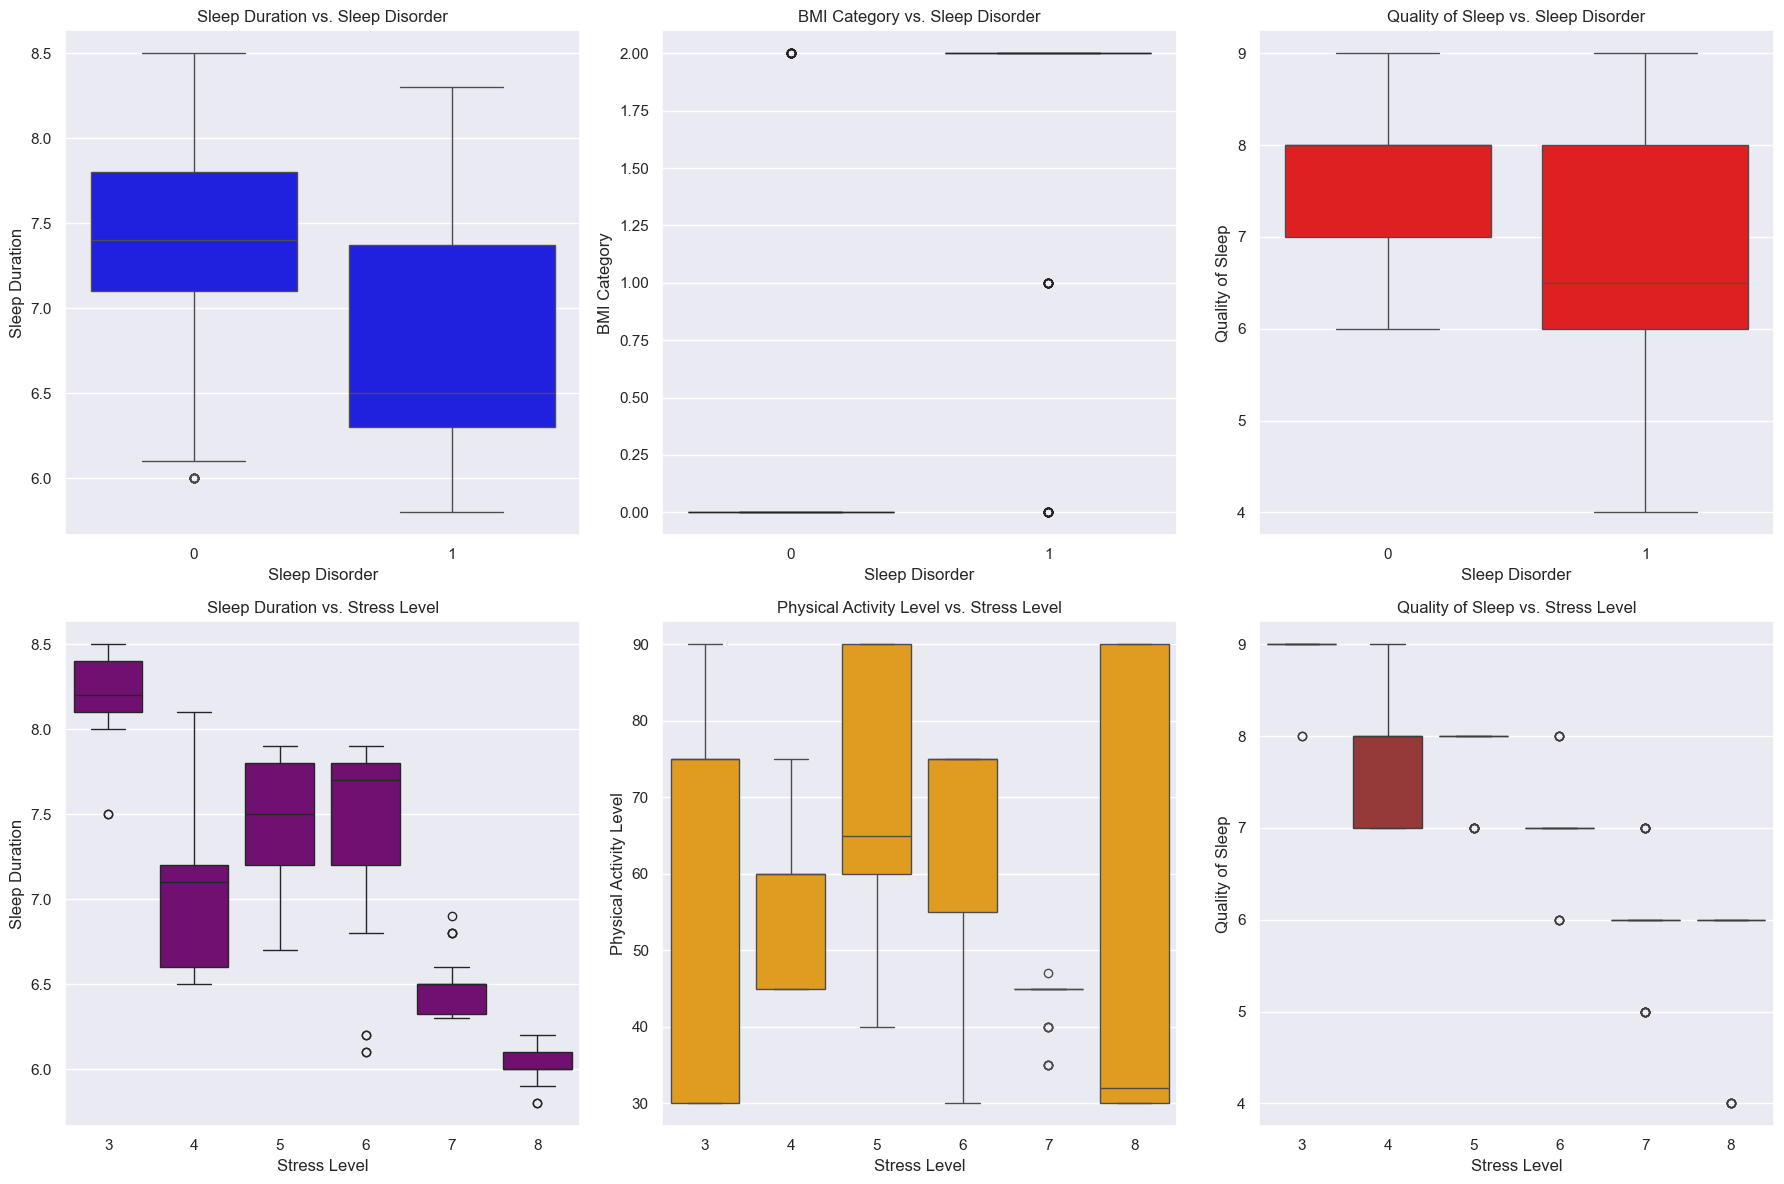

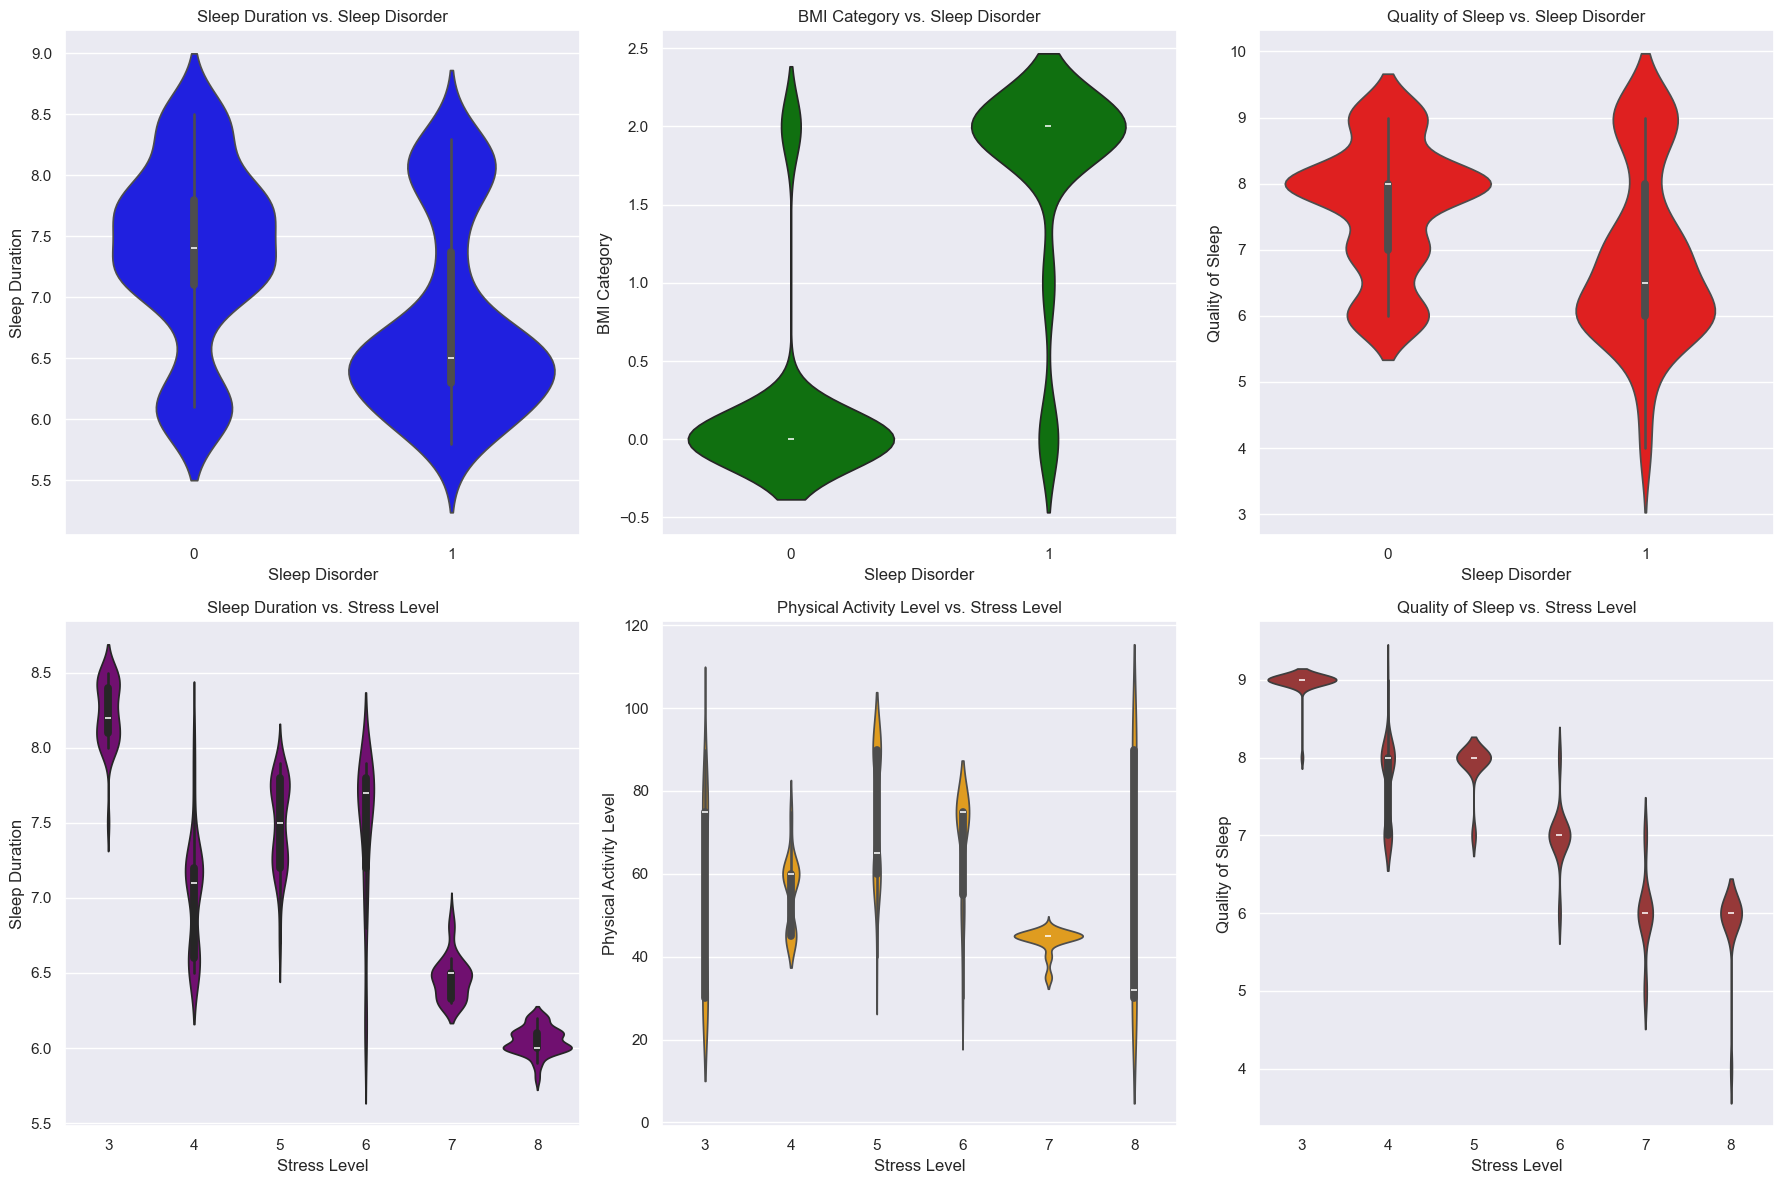

In [816]:
# Initial plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting graphs related to sleep
sb.boxplot(data=sleepData, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.boxplot(data=sleepData, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.boxplot(data=sleepData, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=sleepData, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.boxplot(data=sleepData, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.boxplot(data=sleepData, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()

# Initial plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting graphs related to sleep
sb.violinplot(data=sleepData, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=sleepData, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.violinplot(data=sleepData, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.violinplot(data=sleepData, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=sleepData, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=sleepData, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")


plt.tight_layout()
plt.show()


## Boxplot and Violin Plots after removing outliers

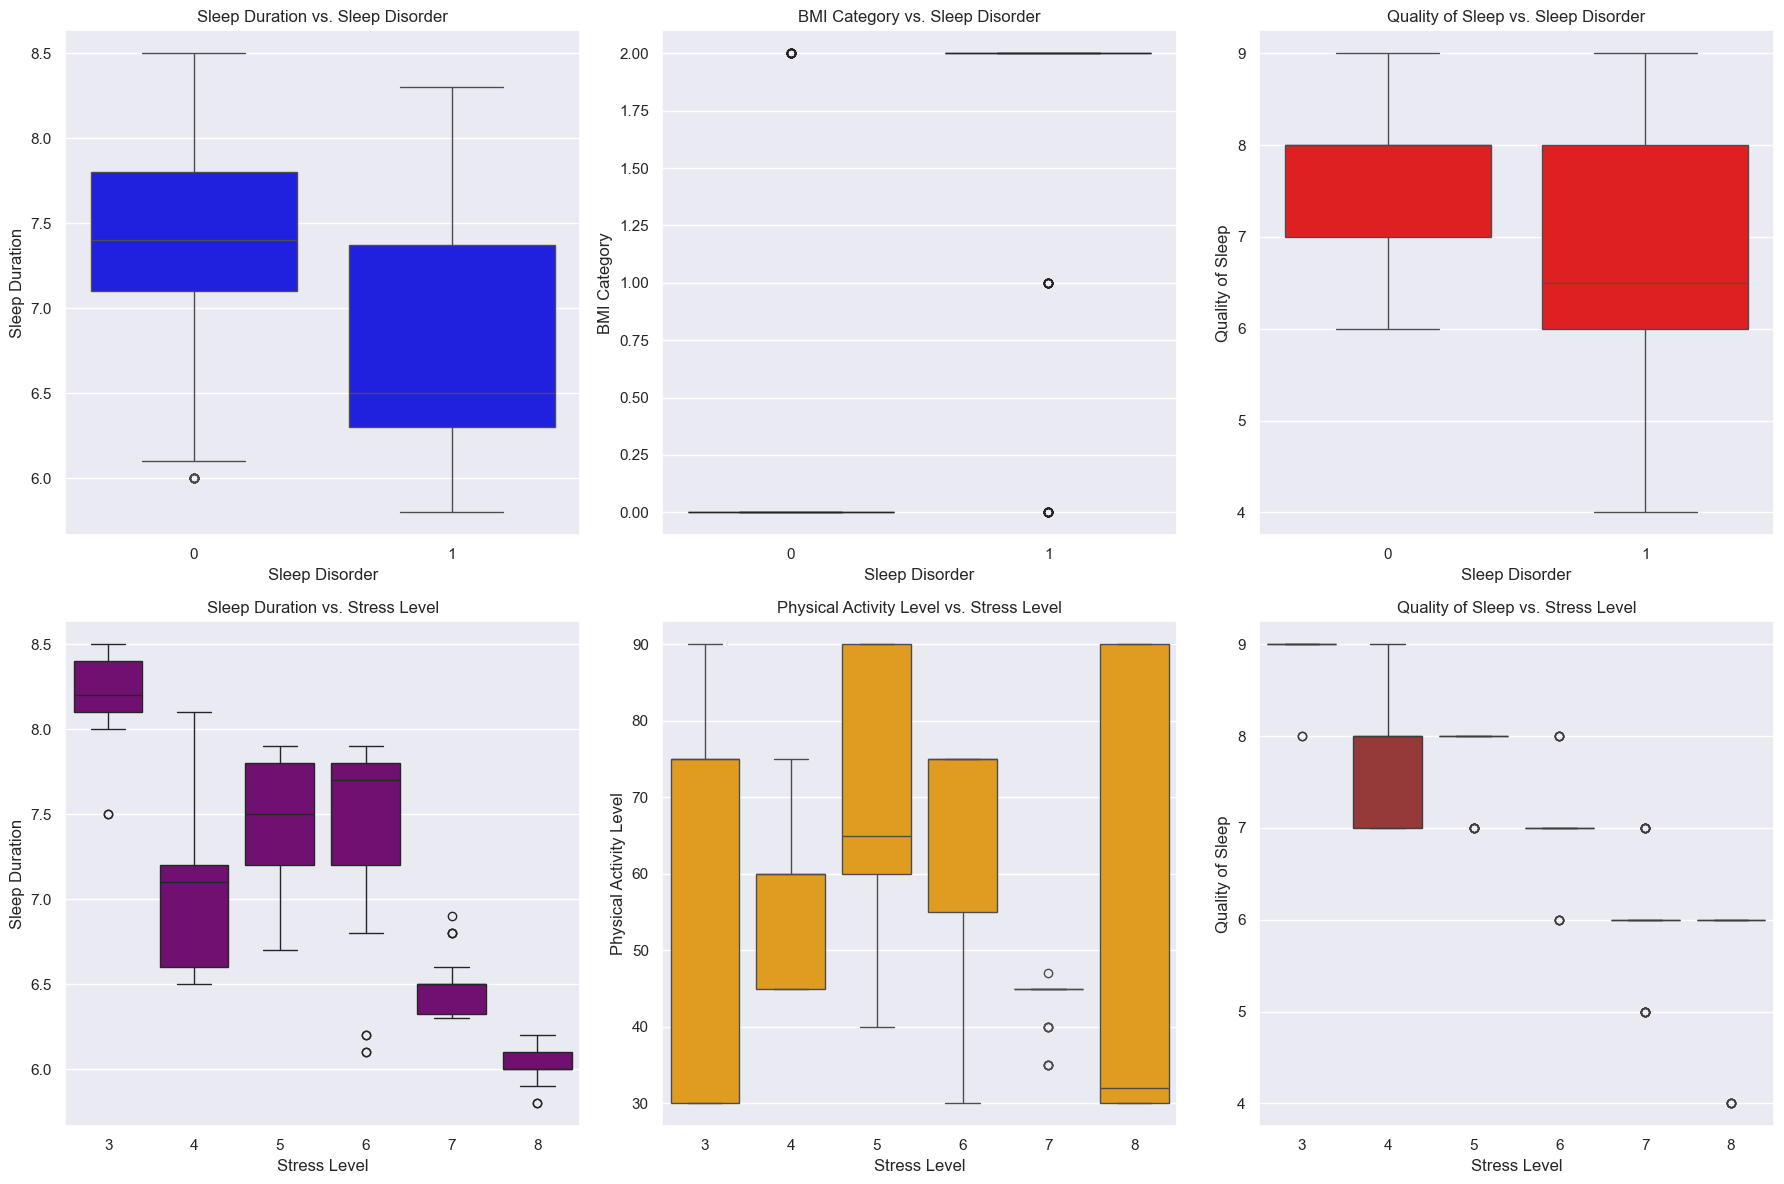

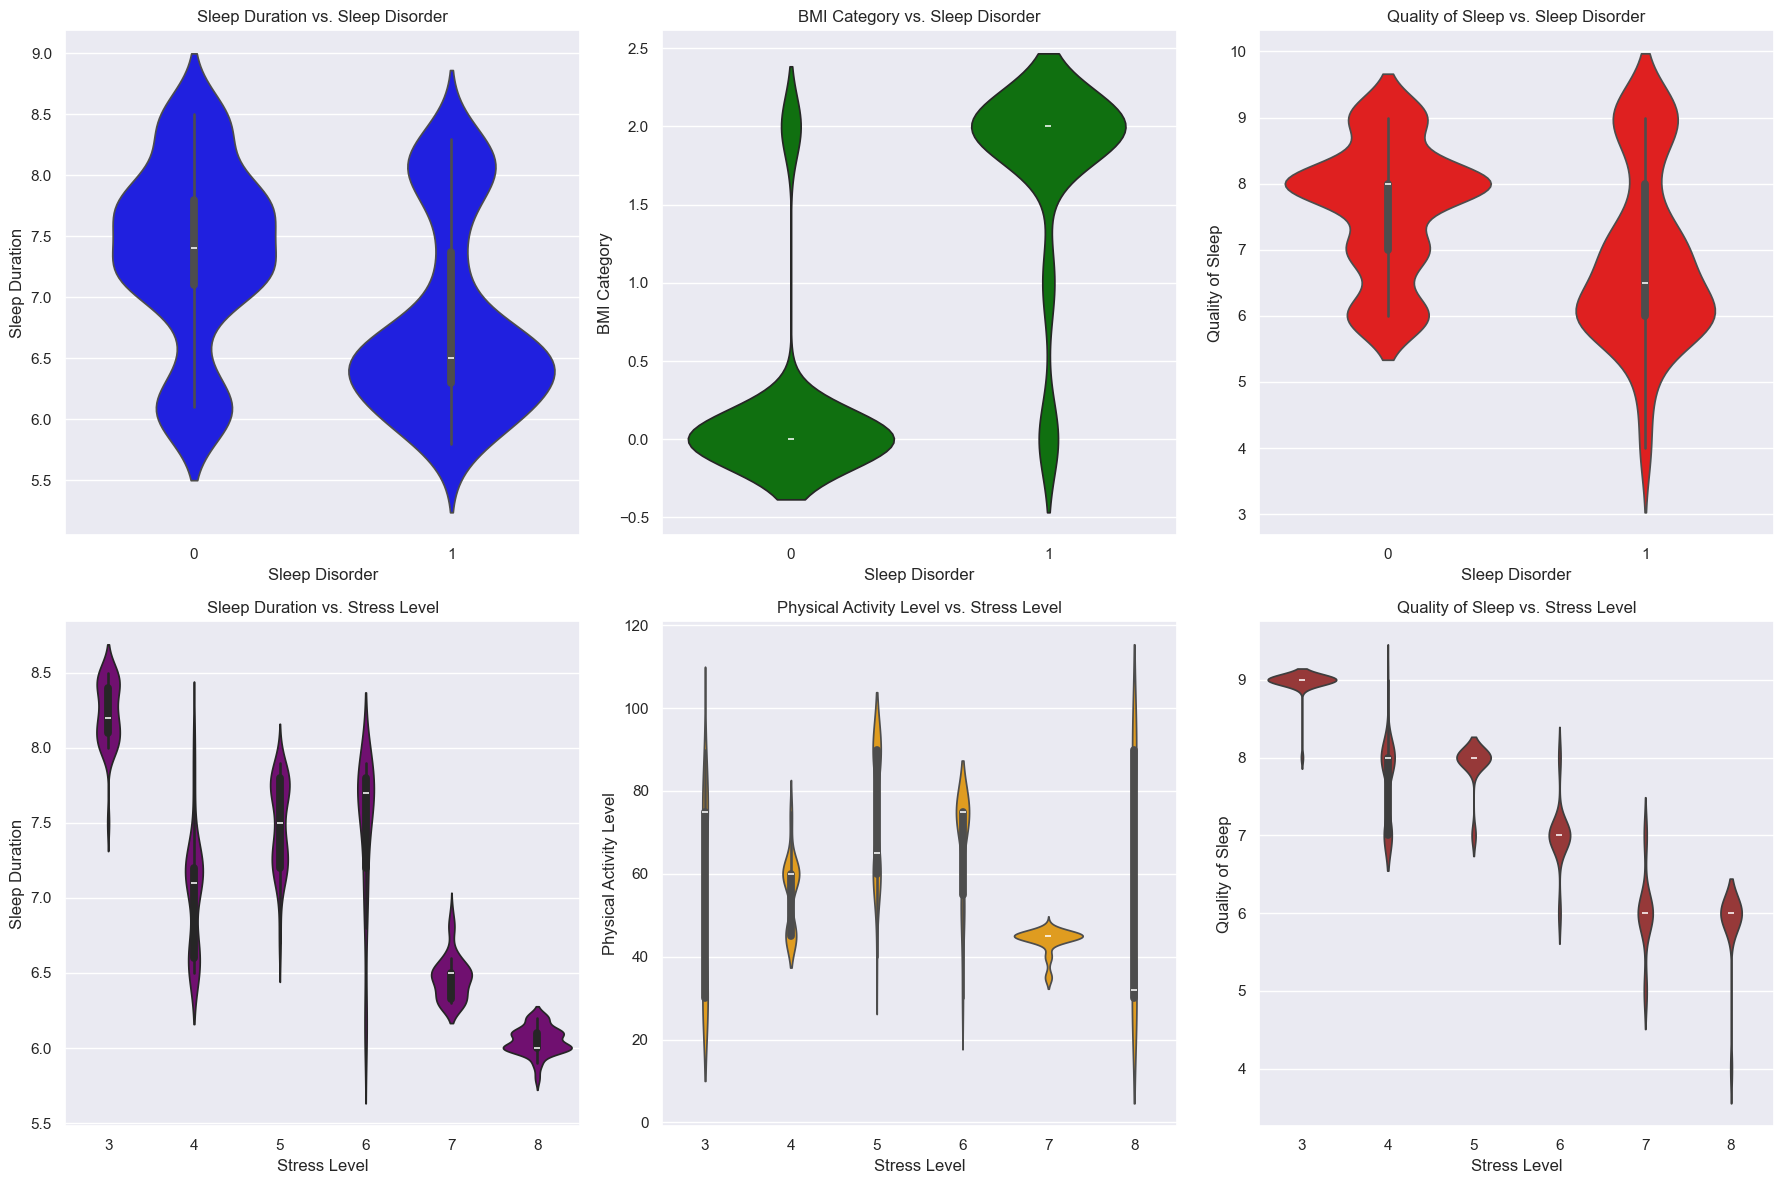

In [817]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for each column
clean_data = remove_outliers(sleepData, "Sleep Duration")
clean_data = remove_outliers(clean_data, "Quality of Sleep")
clean_data = remove_outliers(clean_data, "BMI Category")
clean_data = remove_outliers(clean_data, "Physical Activity Level")
clean_data = remove_outliers(clean_data, "Stress Level")

# Recreating the plots without outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the graphs related to sleep without outliers
sb.boxplot(data=clean_data, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.boxplot(data=clean_data, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.boxplot(data=clean_data, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.boxplot(data=clean_data, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.boxplot(data=clean_data, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.boxplot(data=clean_data, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the graphs related to sleep without outliers
sb.violinplot(data=clean_data, y="Sleep Duration", x="Sleep Disorder", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Sleep Duration vs. Sleep Disorder")

sb.violinplot(data=clean_data, y="BMI Category", x="Sleep Disorder", ax=axes[0, 1], color="green")
axes[0, 1].set_title("BMI Category vs. Sleep Disorder")

sb.violinplot(data=clean_data, y="Quality of Sleep", x="Sleep Disorder", ax=axes[0, 2], color="red")
axes[0, 2].set_title("Quality of Sleep vs. Sleep Disorder")

# Plotting graphs related to stress
sb.violinplot(data=clean_data, y="Sleep Duration", x="Stress Level", ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Sleep Duration vs. Stress Level")

sb.violinplot(data=clean_data, y="Physical Activity Level", x="Stress Level", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Physical Activity Level vs. Stress Level")

sb.violinplot(data=clean_data, y="Quality of Sleep", x="Stress Level", ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Quality of Sleep vs. Stress Level")

plt.tight_layout()
plt.show()

# Sleep Disorder Analysis

## Split dataset into training and test sets

In [818]:
from sklearn.model_selection import train_test_split, cross_val_score

# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, physicalActivity, stressLevel, bmiCategory, 
               bloodPressure, heartRate, dailySteps], axis=1)
y = sleepDisorder.values.ravel()  # Flatten sleepDisorder into a 1D array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scaling test sets and training sets

In [819]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Function to display ROC curve for data

In [820]:
from sklearn.metrics import roc_curve, auc

def getRocCurve(y_test, y_pred):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Compute Area Under the ROC Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    ## more right angle the top, better the model

## Function to display confusion matrix

In [821]:
from sklearn.metrics import confusion_matrix


def displayConfusionMatrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Use Logistic Regression Model
## Base case model (most simple)

In [822]:
from sklearn.linear_model import LogisticRegression
    
def logisticRegression(X_train, X_test, y_train):
    # Initialize logistic regression model
    log_reg_model = LogisticRegression()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Fit the logistic regression model to your training data with selected features
    log_reg_model.fit(X_train_scaled, y_train)

    # Predict data
    y_pred_log = log_reg_model.predict(X_test_scaled)

    return y_pred_log

## Use Logistic Regression to predict SleepDisorder
### Predictors: "Quality of Sleep", "Sleep Duration", "BMI Category"

Accuracy: 0.89
Precision: 0.91
Recall: 0.85
F1 Score: 0.88


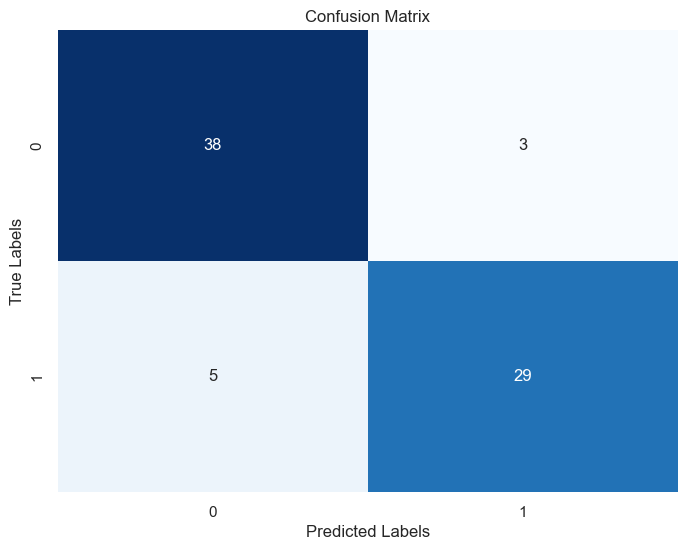

In [823]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictors = ["Quality of Sleep", "Sleep Duration", "BMI Category"]

y_pred = logisticRegression(X_train[predictors], X_test[predictors], y_train)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plotting the confusion matrix
displayConfusionMatrix(y_test, y_pred)


## Demonstrate the Logistic Regression model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

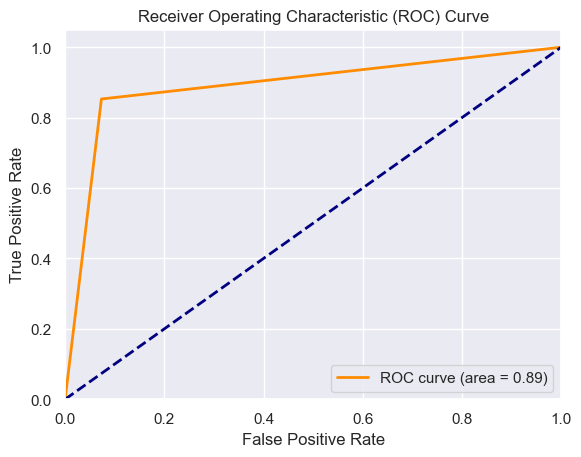

In [824]:
getRocCurve(y_test, y_pred)

# Random Forest Function

In [825]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function for random tree model

def random_forest_train_evaluate(X_train_scaled, X_test_scaled, y_train, y_test):
    # Initialize model
    random_forest = RandomForestClassifier()

    # Train the model
    random_forest.fit(X_train_scaled, y_train)

    # Evaluate the model that used all features using cross-validation
    random_forest_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

    # Check model performance
    print("Random Forest Cross-Validation Scores:", random_forest_scores)

    # Make predictions on the testing data
    y_pred = random_forest.predict(X_test_scaled)

    # Evaluate the models on the test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    return y_pred


## Use Random Forest to predict SleepDisorder
### Predictors: "Quality of Sleep", "Sleep Duration", "BMI Category"

Random Forest Cross-Validation Scores: [0.93333333 0.83333333 0.93333333 0.94915254 0.89830508]
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



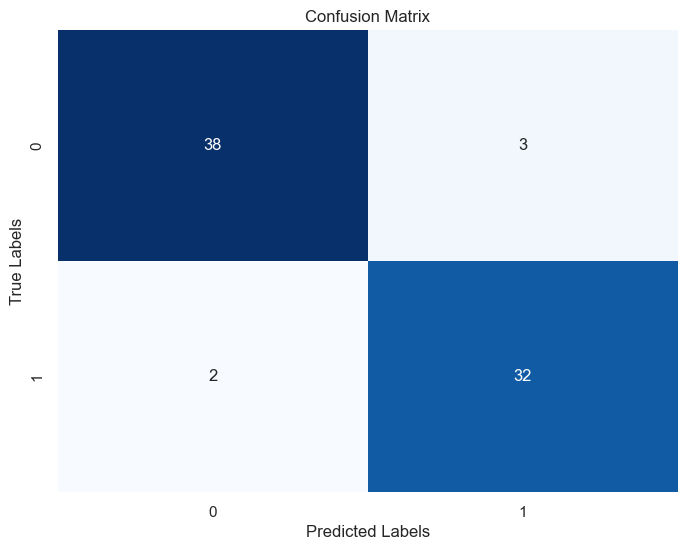

In [826]:
# Filter X_train and X_test 
X_train_selected = X_train[["Quality of Sleep", "Sleep Duration", "BMI Category"]]
X_test_selected = X_test[["Quality of Sleep", "Sleep Duration", "BMI Category"]]

# # Scale the data
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Put data into function
y_pred = random_forest_train_evaluate(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)

## Demonstrate the Random Forest model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

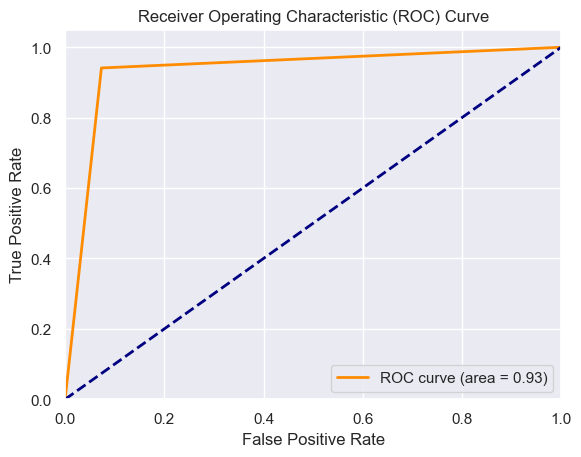

In [827]:
getRocCurve(y_test, y_pred)

# Gradient Boosting Function

In [828]:
from sklearn.ensemble import GradientBoostingClassifier

def gradientBoosting(X_train_scaled, X_test_scaled, y_train, y_test):
    # Assuming X_train, X_test, y_train, y_test are your train-test split data
    # Initialize Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    
    # Fit the model to your training data
    gb_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = gb_model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification report: ", report)
    return y_pred

## Use Random Forest to predict SleepDisorder
### Predictors: "Quality of Sleep", "Sleep Duration", "BMI Category"

Accuracy: 0.9333333333333333
Classification report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.91      0.94      0.93        34

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



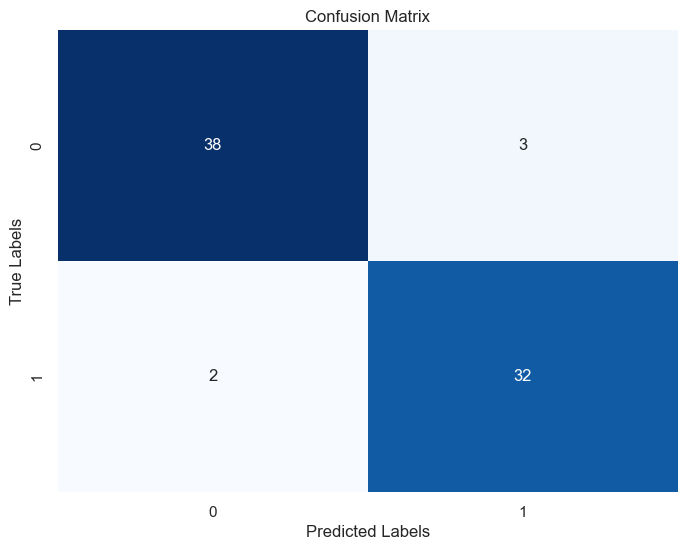

In [829]:
y_pred = gradientBoosting(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)


## Demonstrate the Gradient Boosting model's performance by assessing its ROC AUC (Receiver Operating Characteristic Area Under the Curve).

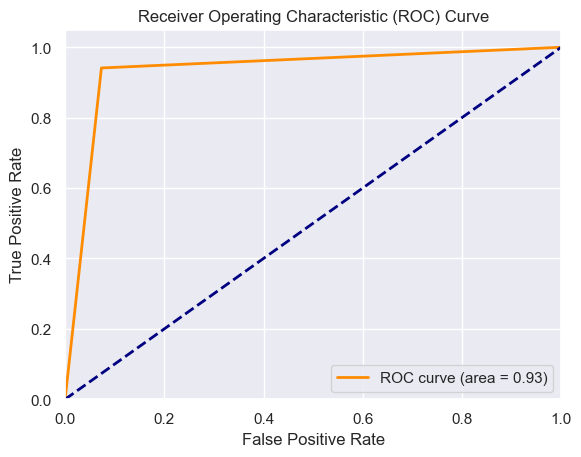

In [830]:
getRocCurve(y_test, y_pred)

# Stress Level Analysis

## Split the data into test and training sets

In [831]:
# Combine variables into a single DataFrame
X = pd.concat([sleepDuration, sleepQuality, physicalActivity, sleepDisorder, bmiCategory, 
               bloodPressure, heartRate, dailySteps], axis=1)

y = stressLevel.values.ravel()  # Flatten sleepDisorder into a 1D array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling training and test sets

In [832]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Use Logistic Regression to predict Stress Level
### Predictors: "Quality of Sleep", "Sleep Duration", "Physical Activity Level"

Accuracy: 0.72
Precision: 0.81
Recall: 0.72
F1 Score: 0.71


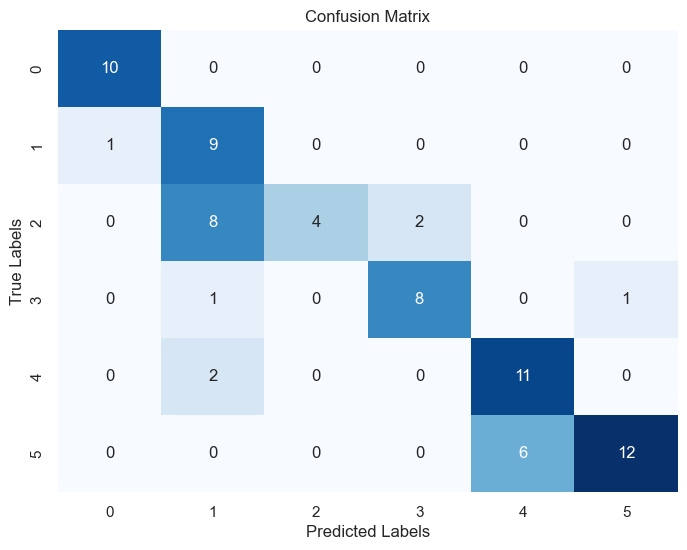

In [833]:
predictors = ["Quality of Sleep", "Sleep Duration", "Physical Activity Level"]

y_pred = logisticRegression(X_train[predictors], X_test[predictors], y_train)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

displayConfusionMatrix(y_test, y_pred)


# Using Random Forest Model to Predict Stress Level

## Use Random Forest to predict Stress Level
### Predictors: "Quality of Sleep", "Sleep Duration", "Physical Activity Level"

Random Forest Cross-Validation Scores: [0.88333333 0.9        0.88333333 0.86440678 0.84745763]
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



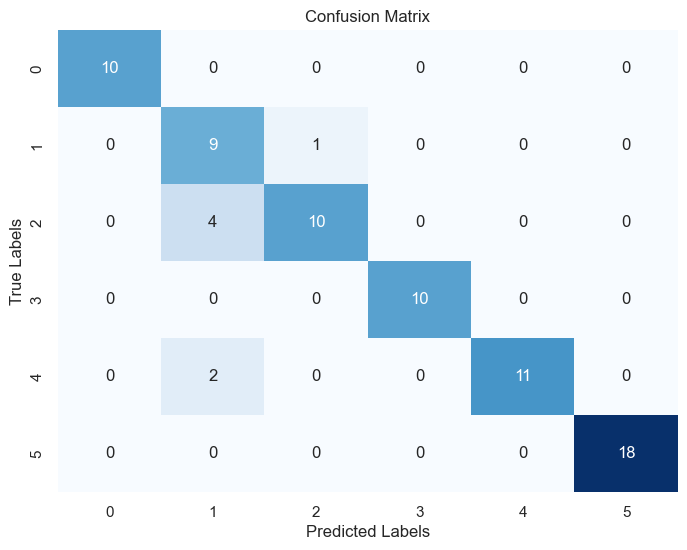

In [834]:
# Filter X_train and X_test 
X_train_selected = X_train[["Quality of Sleep", "Sleep Duration", "Physical Activity Level"]]
X_test_selected = X_test[["Quality of Sleep", "Sleep Duration", "Physical Activity Level"]]

# # Scale the data
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Put data into function
y_pred  = random_forest_train_evaluate(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)


# Using Gradient Boosting to predict Stress Level

## Use Gradient Boosting to predict Stress Level
### Predictors: "Quality of Sleep", "Sleep Duration", "Physical Activity Level"

Accuracy: 0.9066666666666666
Classification report:                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.60      0.90      0.72        10
           5       0.91      0.71      0.80        14
           6       1.00      1.00      1.00        10
           7       1.00      0.85      0.92        13
           8       1.00      1.00      1.00        18

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.91      0.91        75



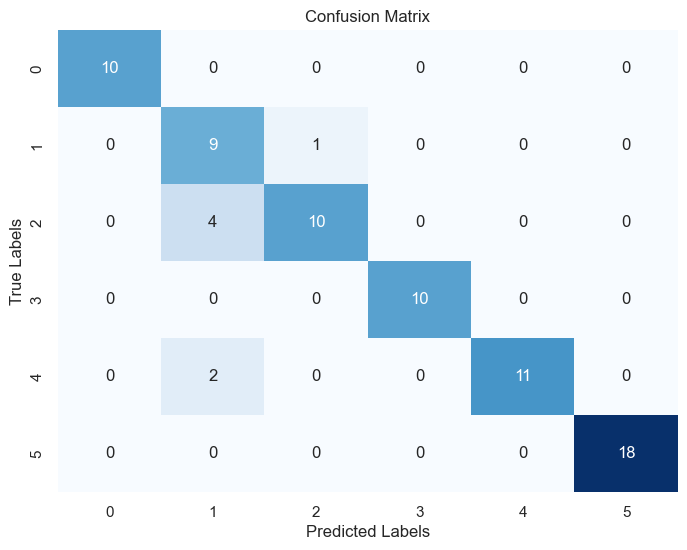

In [835]:
gradientBoosting(X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)
displayConfusionMatrix(y_test, y_pred)